In [1]:
#2.3 多项式回归实现

In [2]:
#第一种方法，最小二乘法
#定义数据
import mindspore as ds
x=[4,8,12,25,32,43,58,63,69,79]
y=[20,33,50,56,42,31,33,46,65,75]
x=ds.numpy.array(x).asnumpy()
y=ds.numpy.array(y).asnumpy()

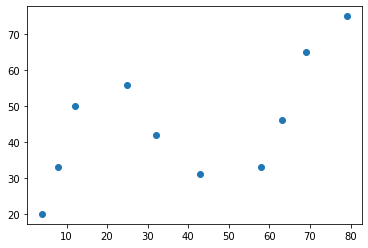

In [3]:
from matplotlib import  pyplot as plt
#绘制图像
plt.scatter(x,y)

In [4]:
#定义二次式函数
def func(p,x):
    w0,w1,w2=p
    f=w0+w1*x+w2*x*x
    return f

In [5]:
#定义误差函数
def err_func(p,x,y):
    ret=func(p,x)-y
    return ret

In [6]:
#利用最小二乘法获得多项式参数
import numpy as np
from  scipy.optimize import leastsq

In [7]:
p_init=np.random.random(3)#初始化数据，0-1生成3个随机数
parameters=leastsq(err_func,p_init,args=(np.array(x),np.array(y)))
print('fitting parameters:',parameters[0])

fitting parameters: [ 3.76893105e+01 -2.60474055e-01  8.00077971e-03]


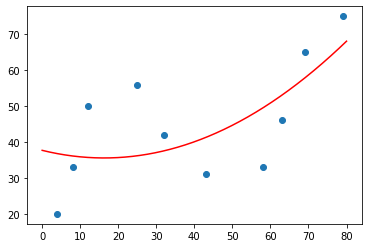

In [8]:
#绘制图像
x_temp=np.linspace(0,80,10000)
plt.plot(x_temp,func(parameters[0],x_temp),'r')
plt.scatter(x,y)

In [9]:
#定义多项式函数
def fit_func(p,x):
    f=np.poly1d(p)
    return f(x)
def err_func(p,x,y):
    ret=fit_func(p,x)-y
    return ret
def n_plot(n):
    p_init=np.random.random(n)
    parameters=leastsq(err_func,p_init,args=(np.array(x),np.array(y)))
    return parameters[0]

In [10]:
n_plot(3)

array([ 8.00077988e-03, -2.60474066e-01,  3.76893106e+01])

Text(0.5, 1.0, 'm=8')

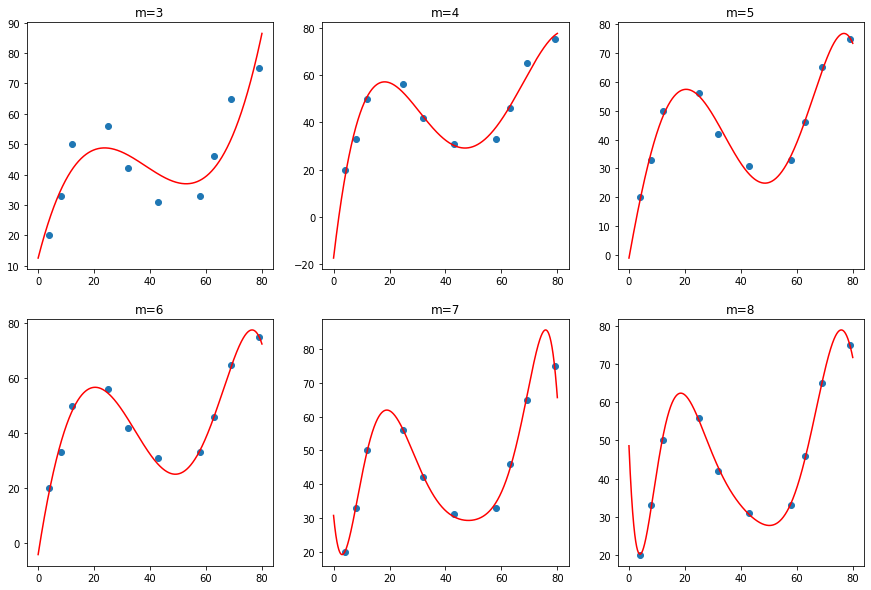

In [11]:
#绘制n次多项式的拟合图像
x_temp=np.linspace(0,80,10000)
fig,axes=plt.subplots(2,3,figsize=(15,10))

axes[0,0].plot(x_temp,fit_func(n_plot(4),x_temp),'r')
axes[0,0].scatter(x,y)
axes[0,0].set_title('m=3')

axes[0,1].plot(x_temp,fit_func(n_plot(5),x_temp),'r')
axes[0,1].scatter(x,y)
axes[0,1].set_title('m=4')

axes[0,2].plot(x_temp,fit_func(n_plot(6),x_temp),'r')
axes[0,2].scatter(x,y)
axes[0,2].set_title('m=5')

axes[1,0].plot(x_temp,fit_func(n_plot(7),x_temp),'r')
axes[1,0].scatter(x,y)
axes[1,0].set_title('m=6')

axes[1,1].plot(x_temp,fit_func(n_plot(8),x_temp),'r')
axes[1,1].scatter(x,y)
axes[1,1].set_title('m=7')

axes[1,2].plot(x_temp,fit_func(n_plot(9),x_temp),'r')
axes[1,2].scatter(x,y)
axes[1,2].set_title('m=8')

In [12]:
#求特征矩阵
from sklearn.preprocessing import PolynomialFeatures
X=[2,-1,2]
X_reshape=np.array(X).reshape(len(X),1)

PolynomialFeatures(degree=2,include_bias=False).fit_transform(X_reshape)

x=np.array(x).reshape(len(x),1)
y=np.array(y).reshape(len(y),1)

poly_features =PolynomialFeatures(degree=2,include_bias=False)
poly_x=poly_features.fit_transform(x)
poly_x

array([[4.000e+00, 1.600e+01],
       [8.000e+00, 6.400e+01],
       [1.200e+01, 1.440e+02],
       [2.500e+01, 6.250e+02],
       [3.200e+01, 1.024e+03],
       [4.300e+01, 1.849e+03],
       [5.800e+01, 3.364e+03],
       [6.300e+01, 3.969e+03],
       [6.900e+01, 4.761e+03],
       [7.900e+01, 6.241e+03]])

In [13]:
#第二种方法：利用多项式特征拟合

from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(poly_x,y)
model.intercept_,model.coef_

(array([37.68931083]), array([[-0.26047408,  0.00800078]]))

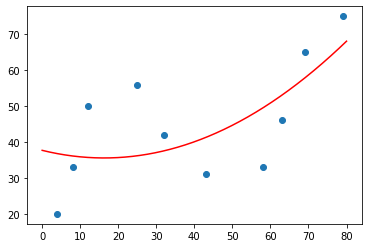

In [14]:
#利用生成的回归方程进行预测
x_temp=np.array(x_temp).reshape(len(x_temp),1)
poly_x_temp=poly_features.fit_transform(x_temp)

plt.plot(x_temp,model.predict(poly_x_temp),'r')
plt.scatter(x,y)